In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
csv_file_path = r'C:\Users\ShashanK\OneDrive\Documents\IMDb Movies India.csv'
movie = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

In [6]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
movie.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [8]:
movie.describe() 

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
movie.shape

(15509, 10)

In [10]:
movie.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
movie.dropna(subset=['Rating'], inplace=True)

In [12]:
movie.isna().sum() 

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [13]:
movie['Genre'].fillna('Unknown', inplace=True)

In [14]:
movie.isna().sum()

Name           0
Year           0
Duration    2068
Genre          0
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [15]:
movie['Duration'] = movie['Duration'].astype(str).str.extract(r'(\d+)').astype(float)

In [16]:
movie['Duration'].fillna(movie['Duration'].median(), inplace=True)

In [17]:
movie.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [18]:
movie.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [19]:
movie.duplicated().sum()

0

In [20]:
movie['Year'] = movie['Year'].str.extract(r'(\d+)').astype(int)

In [21]:
movie['Votes'] = movie['Votes'].str.extract(r'(\d+)').astype(int)

In [22]:
movie.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [23]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [24]:
plt.style.use('default')
num_cols = ['Year', 'Votes']

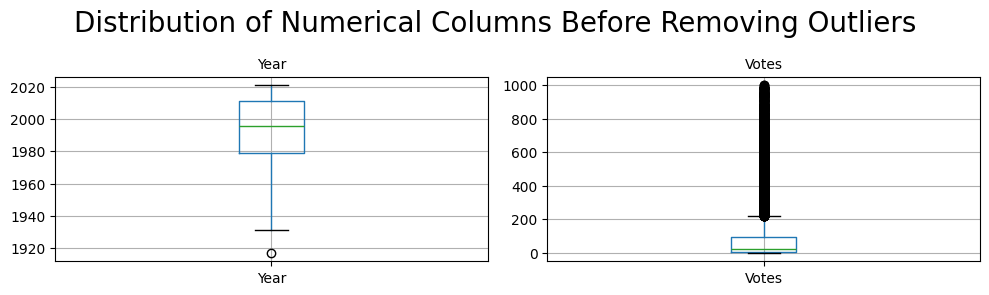

Numebr of rows with outliers before removal: 781
Percentage of rows with outliers before removal: 10.23993706568769


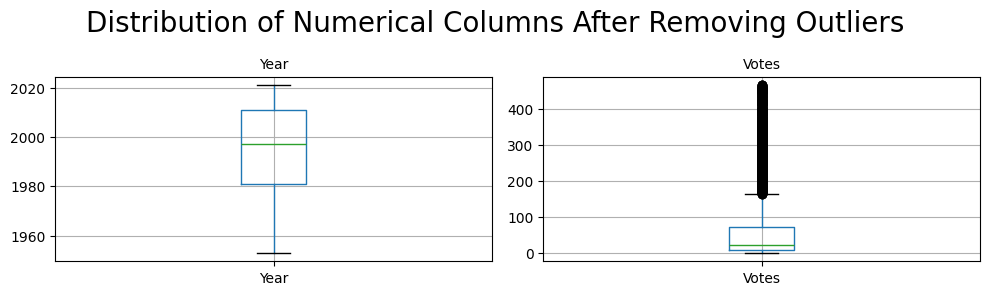

Number of rows with outliers after removal: 781
Percentage of rows with outliers after removal: 11.408121530820917


In [25]:
plt.figure(figsize=(10, 5))
plt.suptitle('Distribution of Numerical Columns Before Removing Outliers', fontsize=20)

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    movie.boxplot(column=[col])
    plt.title(f'{col}', fontsize=10)
plt.tight_layout()
plt.show()

score_z = pd.DataFrame()
for col in num_cols:
    score_z[col] = (movie[col] - movie[col].mean()) / movie[col].std()
threshold_z = 2
outliers = score_z[(score_z.abs() > threshold_z).any(axis=1)]
print("Numebr of rows with outliers before removal:", len(outliers))
print("Percentage of rows with outliers before removal:", len(outliers) / movie.shape[0] * 100)
movie = movie[~((score_z.abs() > threshold_z).any(axis=1))]
plt.figure(figsize=(10, 5))
plt.suptitle('Distribution of Numerical Columns After Removing Outliers', fontsize=20)
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    movie.boxplot(column=[col])
    plt.title(f'{col}', fontsize=10)
plt.tight_layout()
plt.show()

print("Number of rows with outliers after removal:", len(outliers))
print("Percentage of rows with outliers after removal:", len(outliers) / movie.shape[0] * 100)


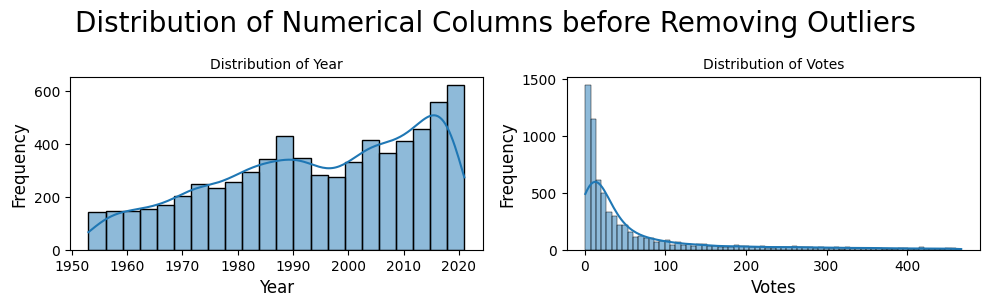

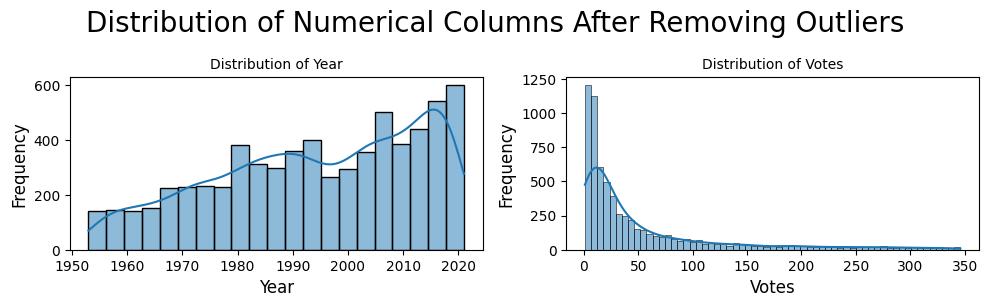

In [26]:
plt.figure(figsize=(10, 5))
plt.suptitle('Distribution of Numerical Columns before Removing Outliers', fontsize=20)

for i, col in enumerate(num_cols,1):
    plt.subplot(2, 2, i)
    sns.histplot(movie[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

score_z = pd.DataFrame()
for col in num_cols:
    score_z[col] = (movie[col] - movie[col].mean()) / movie[col].std()
threshold_z = 3
outliers = score_z[(score_z.abs() > threshold_z).any(axis=1)]
movie = movie[~((score_z.abs() > threshold_z).any(axis=1))]
plt.figure(figsize=(10, 5))
plt.suptitle('Distribution of Numerical Columns After Removing Outliers', fontsize=20)
for i, col in enumerate(num_cols,1):
    plt.subplot(2, 2, i)
    sns.histplot(movie[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

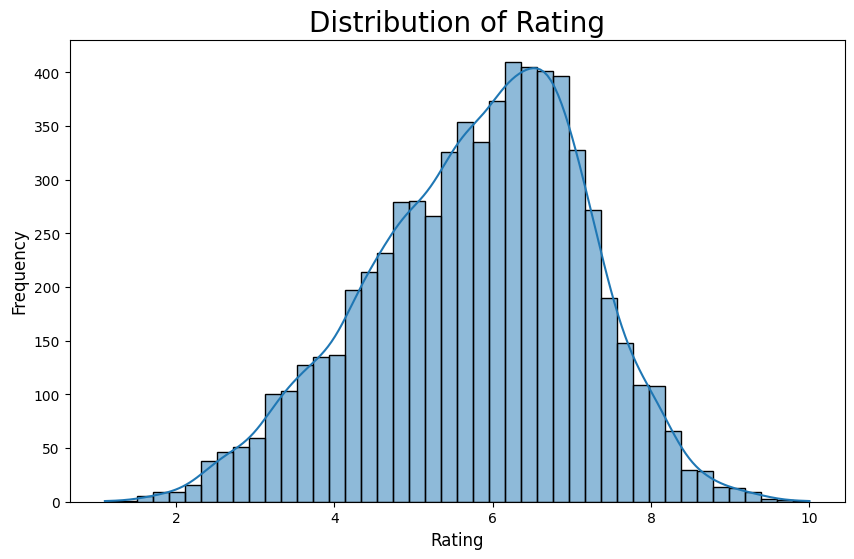

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(movie['Rating'], kde=True)
plt.title('Distribution of Rating', fontsize=20)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

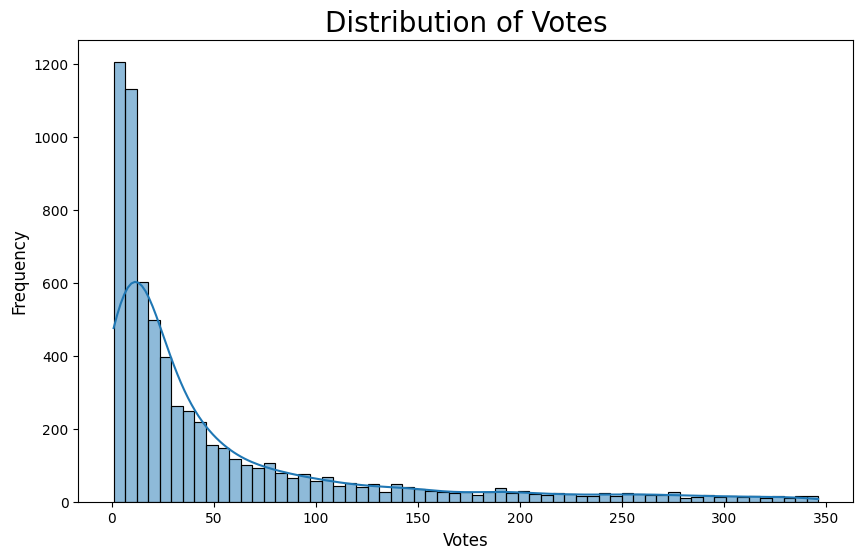

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(movie['Votes'],kde=True)
plt.title('Distribution of Votes', fontsize=20)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

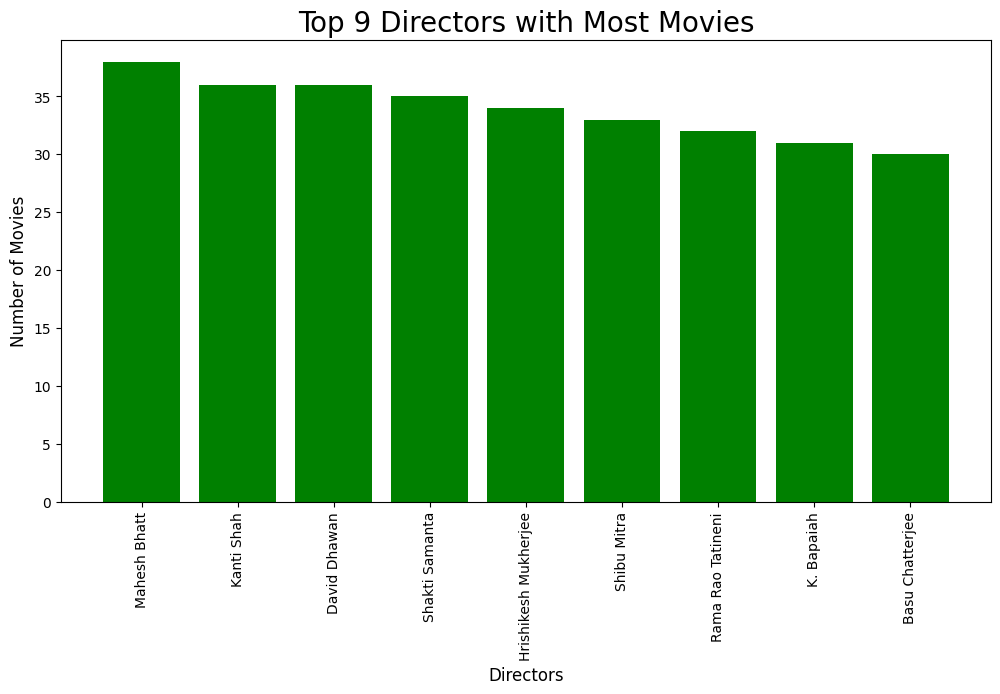

In [29]:
director = movie['Director'].value_counts()
top_9_directors = director.head(9)
plt.figure(figsize=(12, 6))
plt.bar(top_9_directors.index, top_9_directors.values, color='green'),
plt.title('Top 9 Directors with Most Movies', fontsize=20)
plt.xlabel('Directors', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=90)
plt.show()

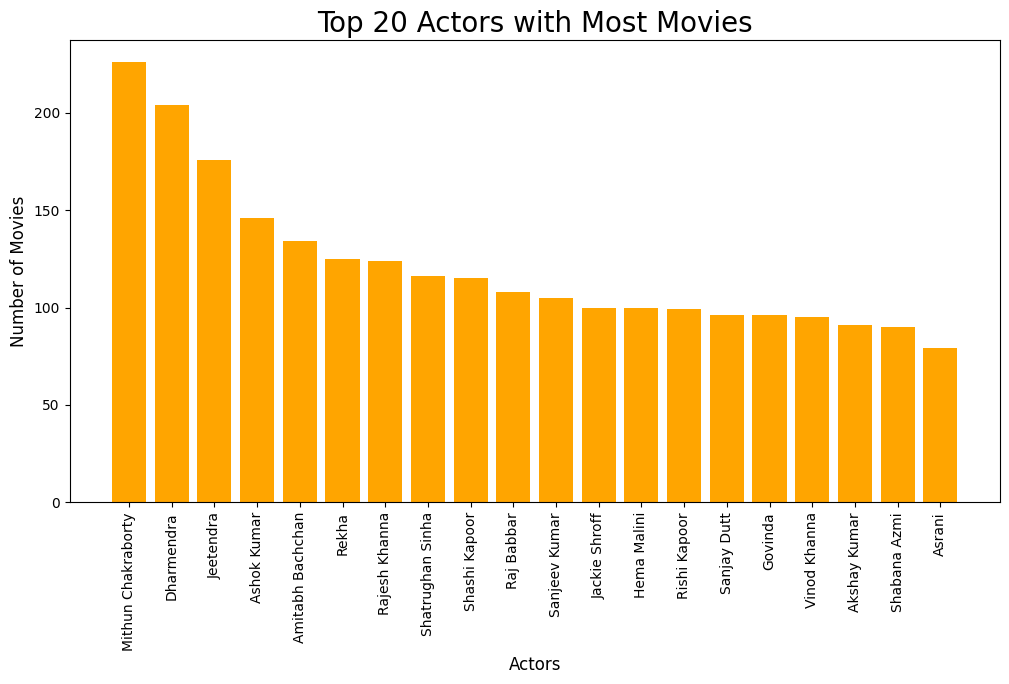

In [30]:
actors = movie[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
top_20_actors = actors.head(20)
plt.figure(figsize=(12,6))
plt.bar(top_20_actors.index, top_20_actors.values, color='orange')
plt.title('Top 20 Actors with Most Movies', fontsize=20)
plt.xlabel('Actors', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=90)
plt.show()

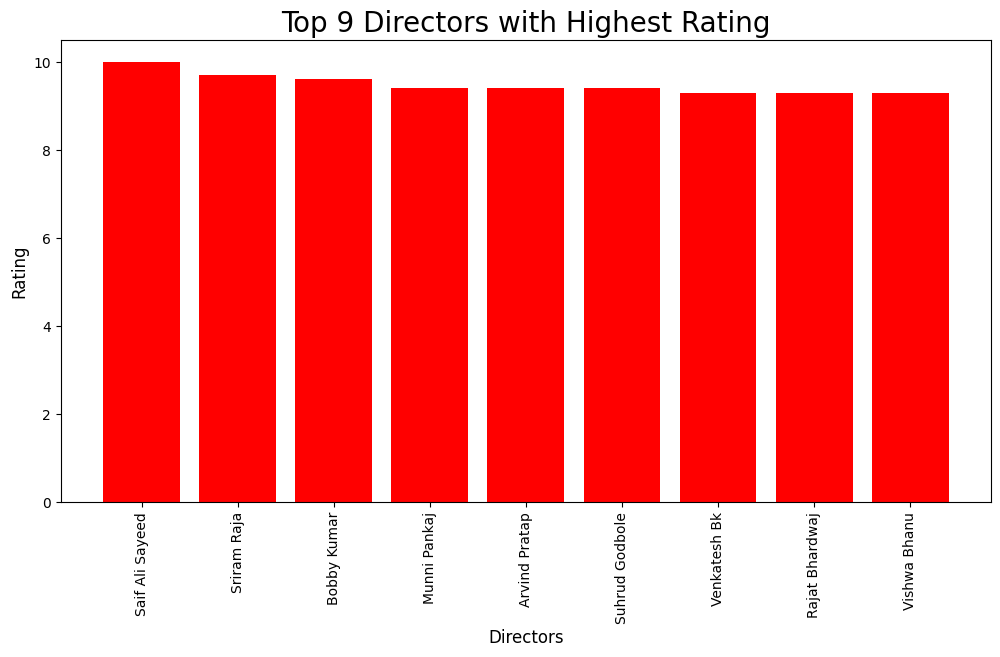

In [31]:
dir_max_rating = movie.groupby('Director')['Rating'].max().sort_values(ascending=False).head(9)
plt.figure(figsize=(12, 6))
plt.bar(dir_max_rating.index, dir_max_rating.values, color='red')
plt.title('Top 9 Directors with Highest Rating', fontsize=20)
plt.xlabel('Directors', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=90)
plt.show()

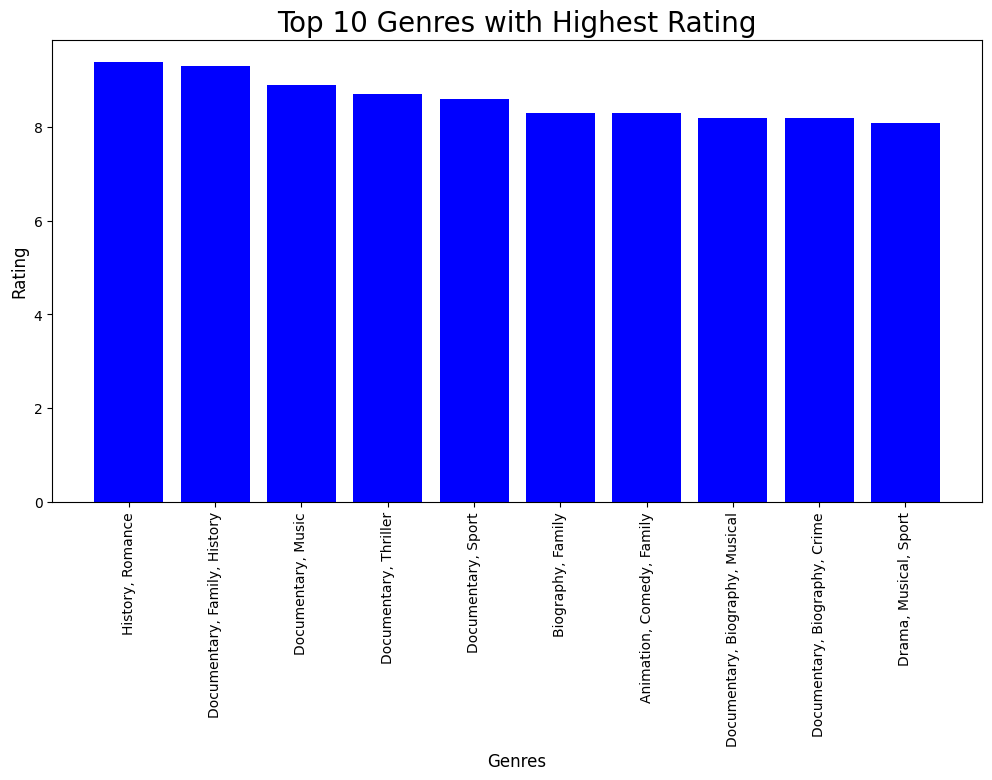

In [32]:
genre_mean_rating = movie.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(genre_mean_rating.index, genre_mean_rating.values, color='blue')
plt.title('Top 10 Genres with Highest Rating', fontsize=20)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=90)
plt.show()

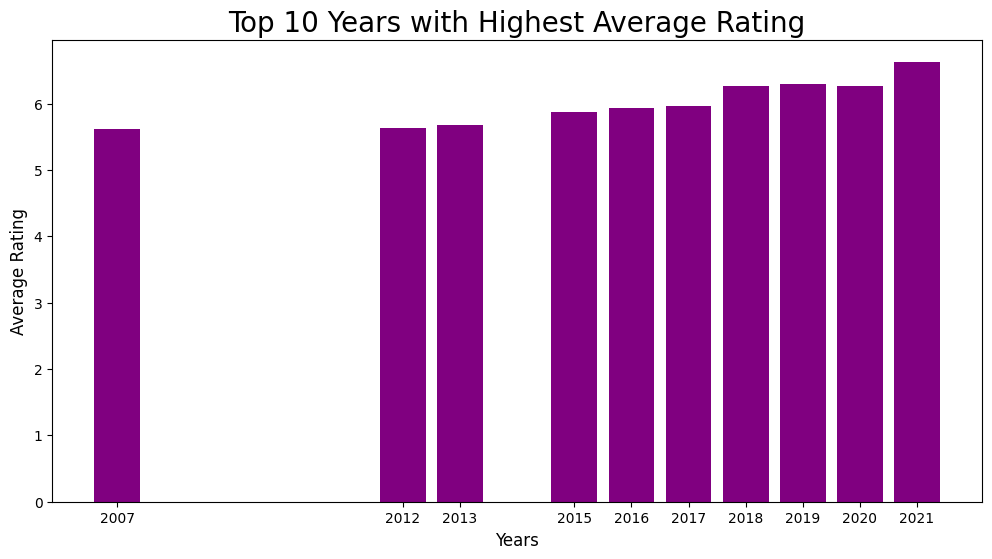

In [33]:
latest_movies = movie[movie['Year'] >= (max(movie['Year']) - 18)]
average_rating = latest_movies.groupby('Year')['Rating'].mean().reset_index()
past10years=average_rating.nlargest(10, 'Rating')
plt.figure(figsize=(12, 6))
plt.bar(past10years['Year'], past10years['Rating'], color='purple')
plt.title('Top 10 Years with Highest Average Rating', fontsize=20)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(past10years['Year'])
plt.show()

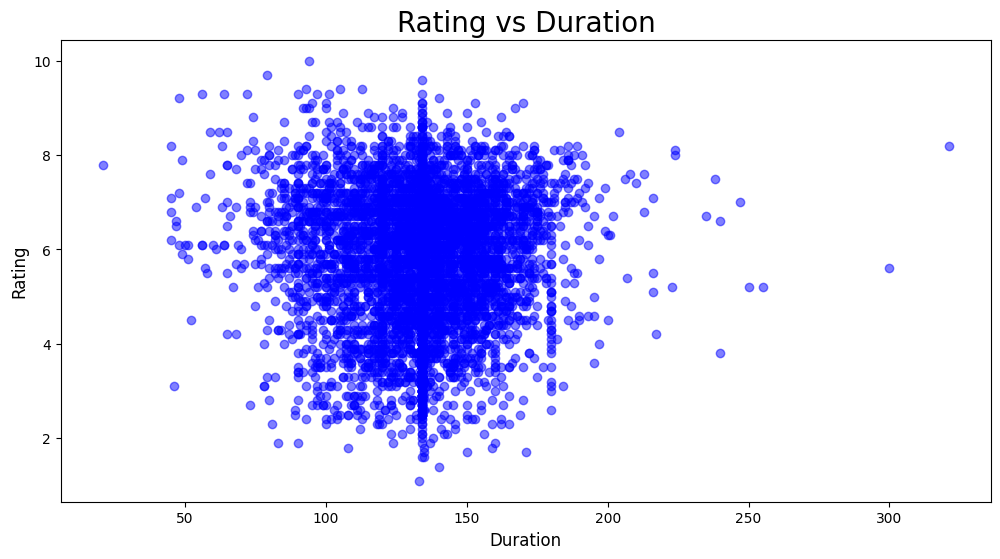

In [34]:
plt.figure(figsize=(12, 6))
plt.scatter(movie['Duration'], movie['Rating'], alpha=0.5, color='blue')
plt.title('Rating vs Duration', fontsize=20)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

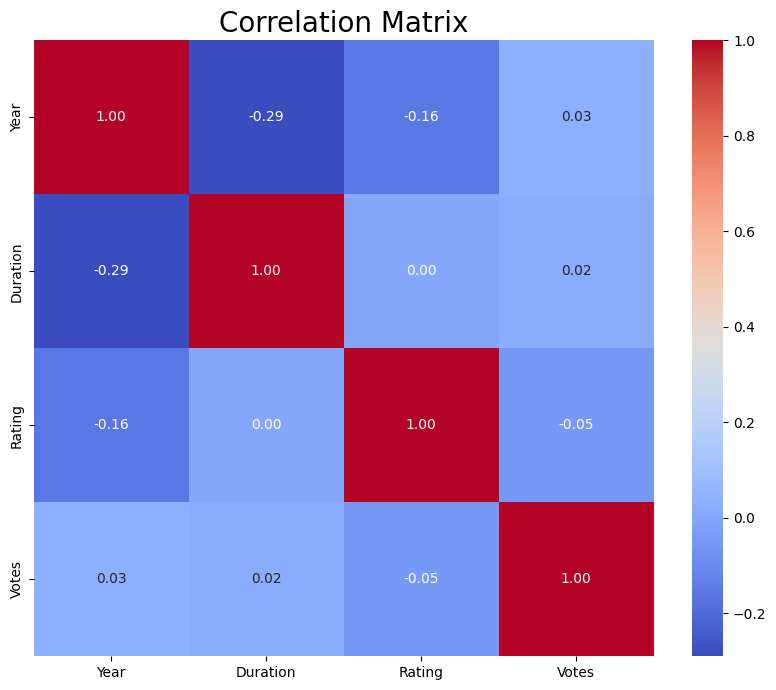

In [35]:
numeric_cols = movie.select_dtypes(include=[np.number])
cor_mat = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.show()

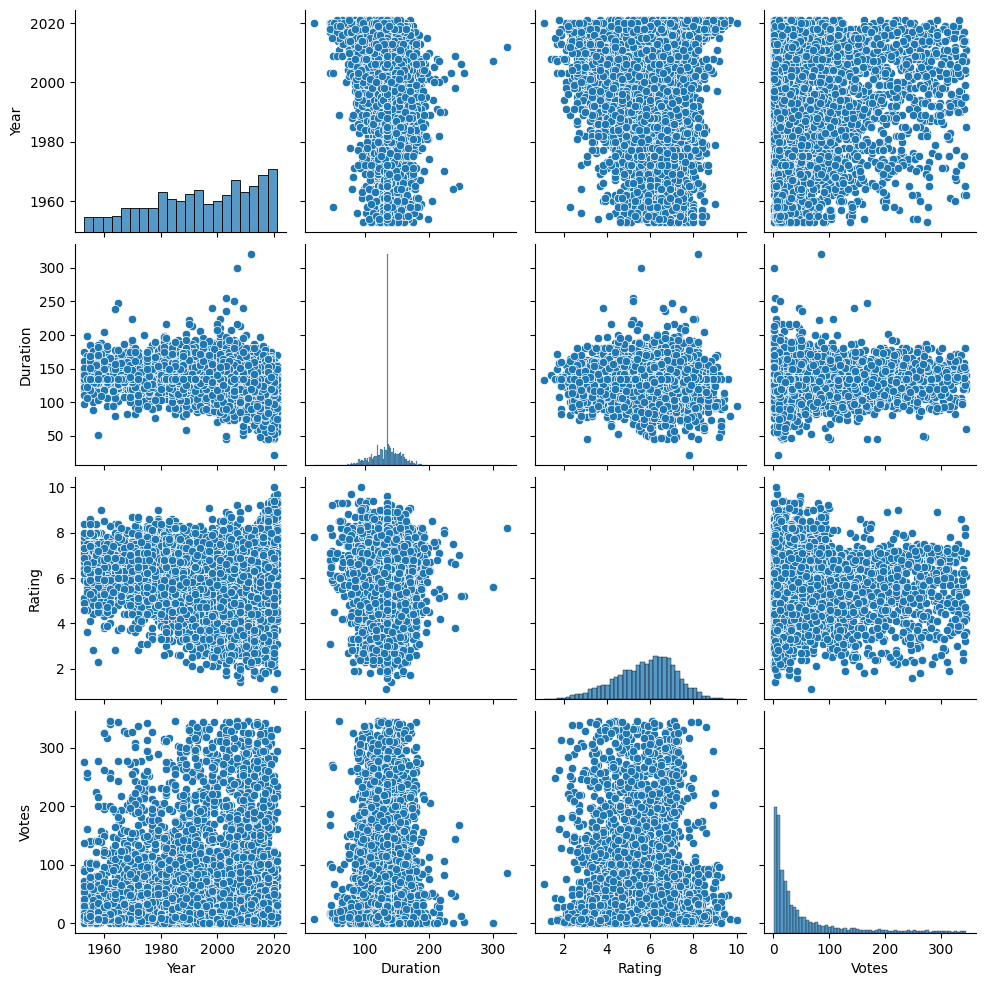

In [36]:
numeric_cols = movie.select_dtypes(include=[np.number])
sns.pairplot(numeric_cols)
plt.show()

In [37]:
x = movie.drop(columns=['Rating'], axis=1)
y = movie['Rating']
x.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116.0,"Action, Crime, Thriller",11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [38]:
x_numeric = x.select_dtypes(include=[np.number])
x_numeric.corr()

,Year,Duration,Votes
Year,1.000000,-0.289813,0.031223
Duration,-0.289813,1.000000,0.017649
Votes,0.031223,0.017649,1.000000


In [39]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [40]:
category_cols = ['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
_1hotenc = OneHotEncoder(sparse_output=False)
cat_enc_x = _1hotenc.fit_transform(x[category_cols])
feature_names = []
for i, col in enumerate(category_cols):
    cats = _1hotenc.categories_[i]
    for cat in cats:
        feature_names.append(f'{col}_{cat}')

cat_enc_x = pd.DataFrame(cat_enc_x, columns=feature_names)
cat_enc_x.head()

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,Name_127 B,Name_13B: Fear Has a New Address,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
num_cols=['Year', 'Votes', 'Duration']
sc = MinMaxScaler()
x_numeric_scaled = sc.fit_transform(x[num_cols])
x_num_df = pd.DataFrame(x_numeric_scaled, columns=num_cols)
x_num_df.head()

,Year,Votes,Duration
0,0.970588,0.020290,0.293333
1,0.970588,0.098551,0.296667
2,0.764706,0.000000,0.403333
3,0.867647,0.942029,0.203333
4,0.897059,0.028986,0.316667


In [42]:
final_x = pd.concat([cat_enc_x, x_num_df], axis=1)
final_x.head()

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,Name_127 B,Name_13B: Fear Has a New Address,...,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed,Year,Votes,Duration
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.970588,0.020290,0.293333
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.970588,0.098551,0.296667
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.764706,0.000000,0.403333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.867647,0.942029,0.203333
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.897059,0.028986,0.316667


In [43]:
sc = MinMaxScaler()
y_scaled = sc.fit_transform(movie['Rating'].values.reshape(-1, 1)).flatten()
y = pd.DataFrame(y_scaled, columns=['Rating'])
y

,Rating
0,0.662921
1,0.370787
2,0.707865
3,0.505618
4,0.325843
...,...
6623,0.426966
6624,0.471910
6625,0.528090
6626,0.393258


In [44]:
x_train, x_test, y_train, y_test = train_test_split(final_x, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
test_pred_y = ridge_model.predict(x_test)
train_pred_y = ridge_model.predict(x_train)
print("Ridge Regression Model")

Ridge Regression Model


In [46]:
mse_test = mean_squared_error(y_test, test_pred_y)
r2_test=r2_score(y_test, test_pred_y)
r2_train=r2_score(y_train, train_pred_y)
mse_train = mean_squared_error(y_train, train_pred_y)
print("Mean Squared Error for Test Data:", mse_test)
print("R2 Score for Test Data:", r2_test)

print("Mean Squared Error for Train Data:", mse_train)
print("R2 Score for Train Data:", r2_train)

Mean Squared Error for Test Data: 0.018003725481410306
R2 Score for Test Data: 0.24103774362511554
Mean Squared Error for Train Data: 0.0010443032543647783
R2 Score for Train Data: 0.9548217027699002


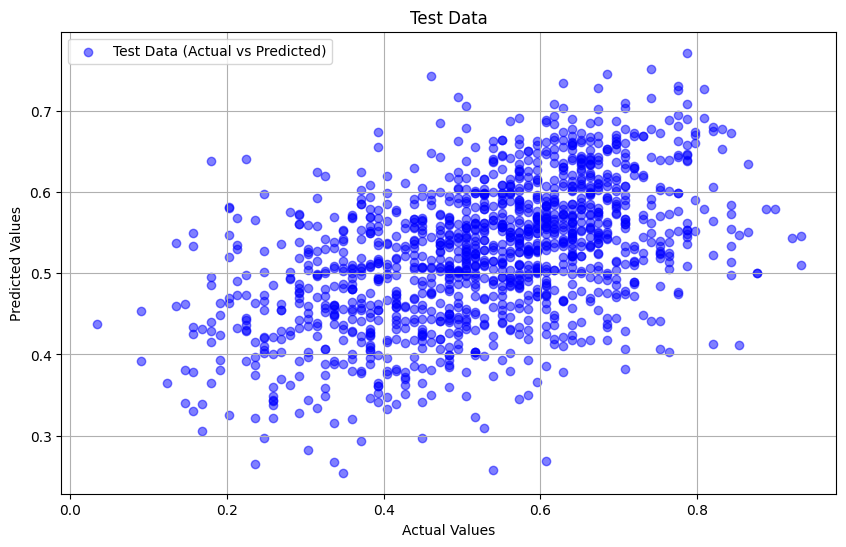

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred_y,color='blue', alpha=0.5, label = 'Test Data (Actual vs Predicted)')
plt.title('Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()   

In [48]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
test_pred_y = rf.predict(x_test)
train_pred_y = rf.predict(x_train)

In [49]:
mse_test = mean_squared_error(y_test, test_pred_y)
r2_test=r2_score(y_test, test_pred_y)
r2_train=r2_score(y_train, train_pred_y)
mse_train = mean_squared_error(y_train, train_pred_y)
print("Random Forest Regressor Model")
print("Mean Squared Error for Test Data: {mse_test}")
print("R2 Score for Test Data: {r2_test}")
print("Mean Squared Error for Train Data: {mse_train}")
print("R2 Score for Train Data: {r2_train}")

Random Forest Regressor Model
Mean Squared Error for Test Data: {mse_test}
R2 Score for Test Data: {r2_test}
Mean Squared Error for Train Data: {mse_train}
R2 Score for Train Data: {r2_train}


In [50]:
# Ensure that the cells defining x_train and y_train are executed before running this cell
gb_mod = GradientBoostingRegressor(random_state=42)
gb_mod.fit(x_train, y_train)
test_pred_y = gb_mod.predict(x_test)
train_pred_y = gb_mod.predict(x_train)

In [51]:
mse_test = mean_squared_error(y_test, test_pred_y)
r2_test=r2_score(y_test, test_pred_y)
r2_train=r2_score(y_train, train_pred_y)
mse_train = mean_squared_error(y_train, train_pred_y)
print("Gradient Boosting Regressor Model")
print("Mean Squared Error for Test Data:", mse_test)
print("R2 Score for Test Data:", r2_test)
print("Mean Squared Error for Train Data:", mse_train)
print("R2 Score for Train Data:", r2_train)

Gradient Boosting Regressor Model
Mean Squared Error for Test Data: 0.018100044182859664
R2 Score for Test Data: 0.23697734739997955
Mean Squared Error for Train Data: 0.015678487231503127
R2 Score for Train Data: 0.3217225424677721


In [52]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [53]:
rf_mod = RandomForestRegressor(random_state=42)

In [65]:
grid = GridSearchCV(estimator=rf_mod, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [67]:
# Use a smaller subset of the data for grid search to reduce resource consumption
x_train_subset = x_train.sample(frac=0.1, random_state=42)
y_train_subset = y_train.loc[x_train_subset.index]

grid.fit(x_train_subset, y_train_subset)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [71]:
best_model = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)
test_pred_y = best_model.predict(x_test)
train_pred_y = best_model.predict(x_train)


Best hyperparameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [73]:
mse_test = mean_squared_error(y_test, test_pred_y)
r2_test=r2_score(y_test, test_pred_y)
r2_train=r2_score(y_train, train_pred_y)
mse_train = mean_squared_error(y_train, train_pred_y)
print(" Random Forest Regressor Model (Testing Data)")
print("Mean Squared Error for Test Data:", mse_test)
print("R2 Score for Test Data:", r2_test)
print(" Random Forest Regressor Model (Training Data)")
print("Mean Squared Error for Train Data:", mse_train)
print("R2 Score for Train Data:", r2_train)

 Random Forest Regressor Model (Testing Data)
Mean Squared Error for Test Data: 0.023287049323159906
R2 Score for Test Data: 0.018314763971051695
 Random Forest Regressor Model (Training Data)
Mean Squared Error for Train Data: 0.022416456850950697
R2 Score for Train Data: 0.030226774532648215


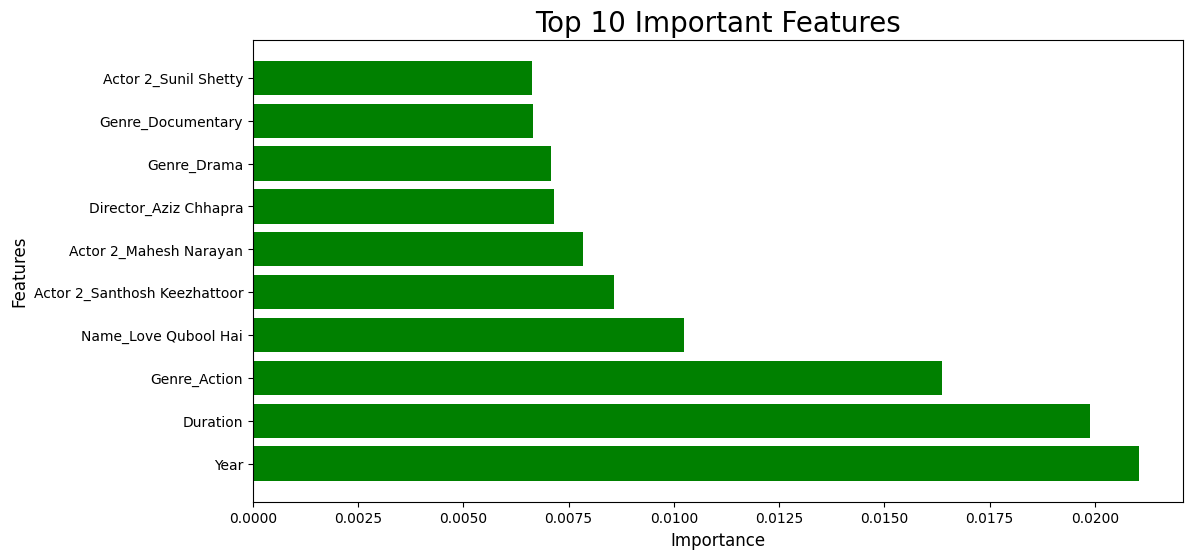

In [77]:
feature_importances = best_model.feature_importances_
features = final_x.columns
top_ind = np.argsort(feature_importances)[::-1][:10]
top_features = features[top_ind]
top_importances = feature_importances[top_ind]
plt.figure(figsize=(12, 6))
plt.barh(range(10), top_importances, align='center',color='green')
plt.yticks(range(10), top_features)
plt.title('Top 10 Important Features', fontsize=20)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()